# Small example showing logistic regression

Plotting 2 sample blops

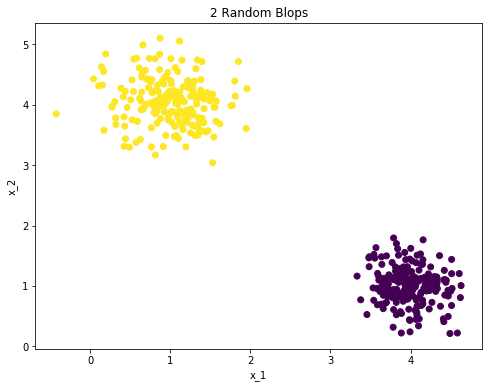

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# generating 2 sample blops
np.random.seed(1234)
M1 = np.c_[1+0.4*np.random.randn(200, 1),
           4 + 0.4*np.random.randn(200, 1),
           np.ones((200, 1))]
M2 = np.c_[4 + 0.3*np.random.randn(200, 1),
           1 + 0.3*np.random.randn(200, 1),
           np.zeros((200, 1))]
M = np.r_[M1, M2]
X = M[:, 0:2]
y = M[:, 2]
# plotting the training blops
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1] , c=y)
plt.title("2 Random Blops")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

Implementation of the Logistic Regression Class

In [22]:
class LogisticRegression:
    def __init__(self):
        pass

    def sigmoid(self, x):
        """
        Calculates the sigmoid of input x
        """
        return 1/(1+np.exp(-x))

    def errorfunction(self, X, y):
        """
        Returns the cross entropy loss of X and y
        """
        n_samples, _ = X.shape
        # calculating gradients, cost and prediction
        prediction = self.sigmoid(np.dot(X, self.W)+self.b)
        error = (-1/n_samples) * np.sum(y * np.log(prediction) +
                                        (1 - y) * np.log(1 - prediction))
        return error

    def train_logistic_regressor(self, X, y, learningrate=0.1, n_iterations=100):
        """
        Trains the logistic regressor
        """
        y = np.array([y])
        y = y.T
        costs = []
        n_samples, n_features = X.shape
        self.W = np.zeros((n_features, 1))
        self.b = 0
        for i in range(n_iterations):
            cost = self.errorfunction(X, y)
            costs.append(cost)
            # print("Cross entropy loss at {i}-th iteration : {MSE}".format(MSE=cost, i=i+1))
            prediction = self.sigmoid(np.dot(X, self.W)+self.b)
            grad_W = (1 / n_samples) * np.dot(X.T, prediction - y)
            grad_b = (1 / n_samples) * np.sum(prediction - y)
            # updating weights and bias'
            self.W = self.W - learningrate * grad_W
            self.b = self.b - learningrate * grad_b
        return self.W, self.b, costs

Training of the logistic regressor

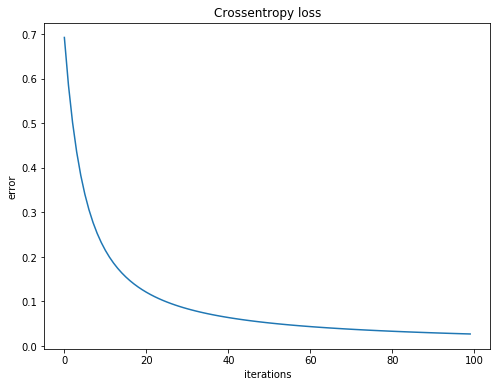

In [23]:
# shuffling the training set
np.random.shuffle(M)
X = M[:, 0:2]
y = M[:, 2]
# training
LR = LogisticRegression()
weights, bias, costs = LR.train_logistic_regressor(X, y)
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(100), costs)
plt.title("Crossentropy loss")
plt.xlabel("iterations")
plt.ylabel("error")
plt.show()

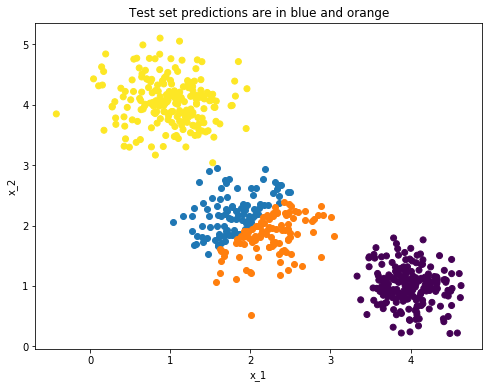

In [17]:
# generating test set
X_test = np.c_[2+0.4*np.random.randn(200, 1),
               2 + 0.4*np.random.randn(200, 1)]
prediction = LR.sigmoid(np.dot(X_test, LR.W)+LR.b)
pos = prediction >= 0.5
pos = pos[:, 0]
neg = (pos == False)
# plotting test predictions
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[pos, 0], X_test[pos, 1])
plt.scatter(X_test[neg, 0], X_test[neg, 1])
plt.title("Test set predictions are in blue and orange")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()